## Training the Model

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:13<00:00,  1.35s/it]


Final metrics: 
Test-Loss: 0.3029196462675668
Test-Accuracy: 0.8031049370765686
Train-Loss: 0.29516110419720676
Train-Accuracy: 0.8115718960762024
# Parameters: 199
NeuralNetwork(
  (model): Sequential(
    (0): Linear(in_features=16, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=7, bias=True)
  )
)


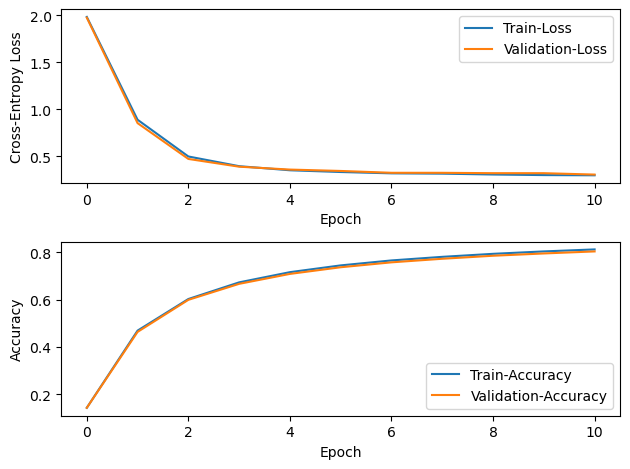

In [1]:
from model.training import train_model_and_visualize
model = train_model_and_visualize([8])

## Creating the LIME Explainer

In [2]:
import tensorflow as tf
import numpy as np
from data.datasets import DryBean
from data.util.utils import DatasetMode
dataset = DryBean(mode=DatasetMode.TRAIN)
dataset_test = DryBean(mode=DatasetMode.TEST)
feature_names = ['Area','Perimeter','MajorAxisLength','MinorAxisLength','AspectRation','Eccenticity','ConvexArea',
                 'EquivDiameter','Extent','Solidity','Roundness','Compactness','ShapeFactor1','ShapeFactor2','ShapeFactor3','ShapeFactor4']
categories = list(dataset.categories.keys())


In [3]:
from model.attribution_methods.lime import Lime
lime_explainer = Lime(dataset_test.datapoints.numpy(),feature_names=feature_names,class_names=categories)

## Explaining an instance locally

In [4]:
i = np.random.randint(0, dataset_test.datapoints.numpy().shape[0])
intercept, local_explanation, local_prediction, prediction_score = lime_explainer.attribute(dataset_test.datapoints.numpy()[i], model.predict, num_features=8)

[0. 4. 4. ... 4. 4. 4.]
Local prediction [0.82918318]
Sample columns  0.999257


D:\University of Bonn\Semster 6\Projektgruppe\Project_Group_Attribution_Method\model\models.py:54: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return nn.functional.softmax(y).detach()


In [5]:
print(intercept)
print(local_explanation)
print(local_prediction)
print(prediction_score)

{4: 0.040173953663719224}
{4: [(6, 0.060705877040519336), (7, 0.07271525403158575), (0, 0.07274170818298138), (5, 0.08280201361586638), (14, 0.10762323295498766), (8, 0.13025192211660866), (11, 0.13098610041219574), (3, 0.13118312283945943)]}
{4: 0.0223135008597094}
{4: array([0.82918318])}


## Submodular Pick

In [6]:
from model.attribution_methods.SubmodularPick import SubmodularPick
sp_explanations = SubmodularPick(lime_explainer, dataset_test.datapoints, model.predict, sample_size=20, no_exps=6, num_features=5)

[0. 4. 4. ... 4. 4. 4.]
Local prediction [0.85495488]
Sample columns  0.9665754
[0. 4. 4. ... 4. 4. 4.]
Local prediction [0.96996426]
Sample columns  0.90416324
[0. 4. 4. ... 4. 4. 4.]
Local prediction [0.53669984]
Sample columns  0.621001
[0. 4. 4. ... 4. 4. 4.]
Local prediction [0.79596694]
Sample columns  0.99481875
[0. 4. 4. ... 4. 4. 4.]
Local prediction [0.89737401]
Sample columns  0.9973212
[0. 4. 4. ... 4. 4. 4.]
Local prediction [0.62675679]
Sample columns  0.7987389
[0. 4. 4. ... 4. 4. 4.]
Local prediction [0.73053439]
Sample columns  0.91919875
[0. 4. 4. ... 4. 4. 4.]
Local prediction [0.92264451]
Sample columns  0.99561936
[0.         4.         4.         ... 4.         4.         3.87298335]


D:\University of Bonn\Semster 6\Projektgruppe\Project_Group_Attribution_Method\model\models.py:54: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return nn.functional.softmax(y).detach()
D:\University of Bonn\Semster 6\Projektgruppe\Project_Group_Attribution_Method\model\models.py:54: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return nn.functional.softmax(y).detach()
D:\University of Bonn\Semster 6\Projektgruppe\Project_Group_Attribution_Method\model\models.py:54: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return nn.functional.softmax(y).detach()
D:\University of Bonn\Semster 6\Projektgruppe\Project_Group_Attribution_Method\model\models.py:54: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an a

Local prediction [0.8042856]
Sample columns  0.986328
[0. 4. 4. ... 4. 4. 4.]
Local prediction [0.70481457]
Sample columns  0.76576257


D:\University of Bonn\Semster 6\Projektgruppe\Project_Group_Attribution_Method\model\models.py:54: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return nn.functional.softmax(y).detach()
D:\University of Bonn\Semster 6\Projektgruppe\Project_Group_Attribution_Method\model\models.py:54: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return nn.functional.softmax(y).detach()


[0. 4. 4. ... 4. 4. 4.]
Local prediction [0.50747859]
Sample columns  0.56867737
[0. 4. 4. ... 4. 4. 4.]
Local prediction [0.79924368]
Sample columns  0.999585
[0. 4. 4. ... 4. 4. 4.]
Local prediction [0.91188714]
Sample columns  0.99957067
[0.         4.         4.         ... 3.87298335 4.         4.        ]
Local prediction [0.62383803]
Sample columns  0.76179886
[0.         4.         3.87298335 ... 4.         4.         4.        ]
Local prediction [0.52994071]
Sample columns  0.56624794
[0. 4. 4. ... 4. 4. 4.]
Local prediction [0.7723823]
Sample columns  0.792725
[0. 4. 4. ... 4. 4. 4.]
Local prediction [0.82547687]
Sample columns  0.9790133
[0. 4. 4. ... 4. 4. 4.]
Local prediction [0.76749391]
Sample columns  0.9574307
[0. 4. 4. ... 4. 4. 4.]


D:\University of Bonn\Semster 6\Projektgruppe\Project_Group_Attribution_Method\model\models.py:54: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return nn.functional.softmax(y).detach()
D:\University of Bonn\Semster 6\Projektgruppe\Project_Group_Attribution_Method\model\models.py:54: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return nn.functional.softmax(y).detach()
D:\University of Bonn\Semster 6\Projektgruppe\Project_Group_Attribution_Method\model\models.py:54: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return nn.functional.softmax(y).detach()
D:\University of Bonn\Semster 6\Projektgruppe\Project_Group_Attribution_Method\model\models.py:54: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an a

Local prediction [0.85040994]
Sample columns  0.901613
[0. 4. 4. ... 4. 4. 4.]
Local prediction [0.93476231]
Sample columns  0.9983454


D:\University of Bonn\Semster 6\Projektgruppe\Project_Group_Attribution_Method\model\models.py:54: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return nn.functional.softmax(y).detach()


In [7]:
for exp in sp_explanations.sp_explanations :
    print(exp)

{4: [(5, 0.08662845684774337), (2, 0.15066090291522344), (4, 0.15301677002248748), (13, 0.21944891228809096), (14, 0.24831737205819165)]}
{5: [(0, 0.0020248640198418976), (11, 0.08326629393149881), (4, 0.09917699662940149), (7, 0.1379608331327275), (1, 0.22542054879097848)]}
{3: [(1, 0.04586430418366157), (2, 0.10309325592743694), (12, 0.16180671278816203), (3, 0.20981738320335555), (15, 0.22175766175262396)]}
{0: [(14, -0.09217901531017055), (9, -0.09226706851045709), (0, 0.12051694380600561), (6, 0.18531666169342617), (7, 0.21015588605499372)]}
{3: [(5, 0.0402508733630131), (3, 0.07542132868197417), (14, 0.09031836933793878), (7, 0.09335308288584653), (10, 0.0939412987022829)]}
{6: [(8, 0.10097756988325436), (13, -0.1327254417430696), (14, -0.14202723280778562), (3, 0.17355158739447926), (6, 0.19001462746733744)]}
